In [1]:
using ModelingToolkit, Sophon, DomainSets
using Optimization, OptimizationOptimJL

@parameters t
@variables u(..)
Dₜ = Differential(t)
ω = 0.01

eq = Dₜ(u(t))~cos(0.01*t)
bcs = [
    u(0)~0,
]

domain = [t∈-600..600]
@named ode = PDESystem(eq, bcs, domain, [t], [u(t)])

PDESystem
Equations: Equation[Differential(t)(u(t)) ~ cos(0.01t)]
Boundary Conditions: Equation[u(0) ~ 0]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(t, -600..600)]
Dependent Variables: Num[u(t)]
Independent Variables: Num[t]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [2]:
sampler = QuasiRandomSampler(1000, 1)
pinn = PINN(Siren(1,16,16,16,16,1; omega=0.01f0))
strategy = NonAdaptiveTraining(1, 50)

prob = Sophon.discretize(ode, pinn, sampler, strategy)

OptimizationProblem. In-place: true
u0: ComponentVector{Float64}(layer_1 = (weight = [-0.003309581195935607; -0.004154556896537542; … ; 0.009818446822464466; -0.0066983457654714584;;], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_2 = (weight = [0.1387418657541275 0.5637615323066711 … -0.42849135398864746 -0.20847907662391663; 0.1903318166732788 0.587463915348053 … 0.3471759557723999 -0.28931453824043274; … ; 0.08978905528783798 0.1805209070444107 … -0.2314082384109497 0.43300431966781616; -0.001872681314125657 0.17248553037643433 … 0.1124790608882904 0.25642696022987366], bias = [0.0; 0.0; … ; 0.0; 0.0;;]), layer_3 = (weight = [-0.08432869613170624 0.5357442498207092 … 0.3560633361339569 -0.18185995519161224; -0.27841922640800476 0.03247543051838875 … 0.004639691207557917 0.5854868292808533; … ; -0.4239901304244995 -0.03430168330669403 … 0.0905781164765358 -0.32851171493530273; -0.5172685384750366 0.5143831372261047 … -0.5401006937026978 0.1189761832356453], bias = [0.0; 0.0; … ; 0.0; 0.0

In [3]:
function callback(p, l)
    println("Loss: $l")
    return false
end

res = Optimization.solve(prob, BFGS(); maxiters=2000, callback=callback)

Loss: 0.47441860626855425


Loss: 0.47342007994170937
Loss: 0.4726667257942472


Loss: 0.4659517907250018
Loss: 0.4642183804398342


Loss: 0.4640607316865682
Loss: 0.4638420281434894
Loss: 0.4627347212336706


Loss: 0.46231011413282935
Loss: 0.46202539424553635
Loss: 0.4619046163803581
Loss: 0.4618546116443397


Loss: 0.461810423497064
Loss: 0.46176381279296125
Loss: 0.4616753373606838


Loss: 0.4613277314117843
Loss: 0.4610581176591158


Loss: 0.4609250213000308
Loss: 0.46090485355646826
Loss: 0.4592763266820605
Loss: 0.4585713011880117
Loss: 0.4576207633660694


Loss: 0.4536262354763967
Loss: 0.45292066156282634
Loss: 0.4510542772841001
Loss: 0.4487091807137655
Loss: 0.44640003364484815


Loss: 0.4445340475327045
Loss: 0.44204695559580803
Loss: 0.4414598552859432
Loss: 0.4354570575789822
Loss: 0.4337977528748489


Loss: 0.43122340125062975
Loss: 0.41892263528105117
Loss: 0.4169491293260023


Loss: 0.4010724885835492
Loss: 0.39780945730893136


Loss: 0.3955045330452961
Loss: 0.39090090897363344


Loss: 0.38553492318768984
Loss: 0.3841680502914109
Loss: 0.38161815143716404
Loss: 0.37864479995147066
Loss: 0.3767750145082561


Loss: 0.3745770399690152
Loss: 0.3732436585122287


Loss: 0.3684765010542624
Loss: 0.3676565989383246
Loss: 0.361804259542928
Loss: 0.3613739875385186
Loss: 0.3596828318512014


Loss: 0.3555622893528768
Loss: 0.3518559478381779
Loss: 0.34687088472555816


Loss: 0.3401144977958321
Loss: 0.33276769525107425
Loss: 0.32962398245094837


Loss: 0.32400570010921714
Loss: 0.3224834038955729
Loss: 0.31825771032746003


Loss: 0.3120525227242516
Loss: 0.3022725964877631


Loss: 0.29745496794691484
Loss: 0.28988684822282546
Loss: 0.2874097243626544
Loss: 0.28371076596769473


Loss: 0.2792925736248628
Loss: 0.26950594900363695
Loss: 0.26860457372973295
Loss: 0.26519188189936094


Loss: 0.2631104659214837
Loss: 0.26074651289492434
Loss: 0.25788801448756177


Loss: 0.2553557673635004
Loss: 0.25097527341527254


Loss: 0.24643547309558786
Loss: 0.2417884184879784


Loss: 0.23837851104236651
Loss: 0.23511923983130648
Loss: 0.23249294980138582


Loss: 0.22794911895247424
Loss: 0.21595673201736365
Loss: 0.21531481616204903


Loss: 0.20996612503149537
Loss: 0.20814486815717087
Loss: 0.20410821351906294


Loss: 0.20226056955887056
Loss: 0.19405183178612104
Loss: 0.19346972541004925
Loss: 0.1850945492433154


Loss: 0.18310766119004174
Loss: 0.17929413415064305
Loss: 0.17196123337750713


Loss: 0.1676403737710772
Loss: 0.16577918035940079
Loss: 0.16357370010802125


Loss: 0.16236899318554218
Loss: 0.16012539676955945


Loss: 0.15749212577136237
Loss: 0.1546247961984032
Loss: 0.15345636674067478


Loss: 0.15241538837061583
Loss: 0.15017119095026035


Loss: 0.14887844962967628
Loss: 0.14356348352500442
Loss: 0.1410302116056644


Loss: 0.1380035090550796
Loss: 0.135465552170126


Loss: 0.13408551245593206
Loss: 0.12735713994846493
Loss: 0.12684071155113238
Loss: 0.12305755977855365


Loss: 0.12249550789167496
Loss: 0.11892494467705733
Loss: 0.1186718036505938


Loss: 0.11559111998079742
Loss: 0.11456928933875773
Loss: 0.1127835079035281


Loss: 0.1115795013739679
Loss: 0.10840096884123025


Loss: 0.09150512615869055
Loss: 0.09101812472228657
Loss: 0.08919554999223384


Loss: 0.08659742845599319
Loss: 0.08585635441572301
Loss: 0.0820993261010054


Loss: 0.07828028380871059
Loss: 0.07755203253684691
Loss: 0.07452697120784435


Loss: 0.07427928427034178
Loss: 0.07083276888265727
Loss: 0.0676528817170687


Loss: 0.0666935066552791
Loss: 0.06280239991489814
Loss: 0.062394034686447934


Loss: 0.05934560915936954
Loss: 0.05903780051809544
Loss: 0.056983061466980844


Loss: 0.0563701096261739
Loss: 0.0532223452010349
Loss: 0.05308648435133579
Loss: 0.05069919652905097


Loss: 0.04960422583742156
Loss: 0.048371281596497576


Loss: 0.045537139277027114
Loss: 0.04503944969294934


Loss: 0.043262040324572516
Loss: 0.042054384583141736
Loss: 0.039952735413512394


Loss: 0.03984455210839614
Loss: 0.03745278674890203
Loss: 0.03655900509703044


Loss: 0.034628232288653686
Loss: 0.03393327605252894
Loss: 0.03110868724479039


Loss: 0.030396464061729262
Loss: 0.029013563750755908
Loss: 0.02739737958736563


Loss: 0.026791900985348407
Loss: 0.026331063938180826
Loss: 0.02452515666793978
Loss: 0.02415927713088885


Loss: 0.022088686642638015
Loss: 0.02160682558803154
Loss: 0.020987970946043277
Loss: 0.020818170541030405


Loss: 0.019131416034978047
Loss: 0.018759816471932828
Loss: 0.0181367802047331


Loss: 0.017649533261899216
Loss: 0.017085902834107634
Loss: 0.015484655764922308


Loss: 0.015058941384333968
Loss: 0.013466317043468562
Loss: 0.012931650630997358
Loss: 0.012625338693565974


Loss: 0.011501394600691432
Loss: 0.01035140668593697
Loss: 0.010113905089198558


Loss: 0.009235240371158165
Loss: 0.008723125853516206
Loss: 0.008191977544078691
Loss: 0.006918888030685391
Loss: 0.006732302998966188


Loss: 0.0064464870206074575
Loss: 0.006041666732659392


Loss: 0.005912093295069718
Loss: 0.005353855924684993


Loss: 0.00526284946425856
Loss: 0.004245035210329488
Loss: 0.004130085516165157


Loss: 0.0036959860357234867
Loss: 0.003468291999059637


Loss: 0.0030831464008686553
Loss: 0.002937351523541743
Loss: 0.002671656638495162
Loss: 0.0025098047129714987


Loss: 0.0023190972153258205
Loss: 0.002001050684166386
Loss: 0.001851093974662267
Loss: 0.0016189962023096913


Loss: 0.0015835360713496254
Loss: 0.001421106906227952
Loss: 0.0013727398908591367


Loss: 0.0012984828425963693
Loss: 0.001215919604831008
Loss: 0.0011585578512505455
Loss: 0.0009616772426351938


Loss: 0.0009204936667842974
Loss: 0.0008354739164394357
Loss: 0.0007799943394490423
Loss: 0.000737773394855308
Loss: 0.0006930497124427012
Loss: 0.000549407495035634


Loss: 0.0005340833305418383
Loss: 0.0004633353175747327
Loss: 0.0004274960086507082
Loss: 0.00038009983339819974
Loss: 0.0003495991813636774
Loss: 0.00030184574751578204


Loss: 0.00023787657654388483
Loss: 0.00022428918717477668
Loss: 0.00021940515575338726
Loss: 0.000196908155901414
Loss: 0.00018144230471671475
Loss: 0.00016990709652242665


Loss: 0.00015930645414352122
Loss: 0.00014897442875503168
Loss: 0.0001401256539889786
Loss: 0.0001331772446966893
Loss: 0.00012844056088211038
Loss: 0.00011705281104956386


Loss: 0.00011301490390488491
Loss: 0.00010800586606302298
Loss: 9.756633678240236e-5
Loss: 9.395024559097755e-5
Loss: 8.794170442352348e-5
Loss: 8.403206871353519e-5


Loss: 7.442150507716844e-5
Loss: 7.159252558302708e-5
Loss: 6.617667018638983e-5
Loss: 6.139821023321534e-5
Loss: 5.893186103336251e-5
Loss: 5.70920215147821e-5


Loss: 5.310353009987585e-5
Loss: 5.0136359368981014e-5
Loss: 4.9285908733597655e-5
Loss: 4.584141071394141e-5
Loss: 4.3323672721679535e-5


Loss: 4.157980546427338e-5
Loss: 3.876489414067866e-5
Loss: 3.63624814809294e-5
Loss: 3.5026266096718194e-5
Loss: 3.405914277633522e-5


Loss: 3.3297465608084386e-5
Loss: 3.2348182850338565e-5
Loss: 3.0601550752699496e-5
Loss: 2.953219021087945e-5


Loss: 2.847865982697574e-5
Loss: 2.7287299597143658e-5
Loss: 2.7001467312024127e-5
Loss: 2.5914894437922602e-5
Loss: 2.4889362994315905e-5


Loss: 2.4374113404633402e-5
Loss: 2.3773940940368015e-5
Loss: 2.2280994725309694e-5
Loss: 2.0752377179955272e-5
Loss: 2.0492335825920037e-5


Loss: 1.9330164889391166e-5
Loss: 1.7884365760991048e-5
Loss: 1.649457633075697e-5
Loss: 1.567883611834899e-5
Loss: 1.5402392871114597e-5


Loss: 1.4691693951932336e-5
Loss: 1.4078441879499928e-5
Loss: 1.3418120811769994e-5
Loss: 1.3287604717023621e-5
Loss: 1.2898458365598594e-5


Loss: 1.2329018485580847e-5
Loss: 1.1766357247452285e-5
Loss: 1.1149723393591534e-5
Loss: 1.0219914190971838e-5
Loss: 9.921522564236932e-6


Loss: 9.157004903537261e-6
Loss: 8.67295788082574e-6
Loss: 8.238246732722186e-6
Loss: 7.717297655175719e-6
Loss: 7.419297990131609e-6


Loss: 7.16330960799001e-6
Loss: 6.92666340764526e-6
Loss: 6.698053134349001e-6
Loss: 6.419205075010485e-6


Loss: 6.162289176400761e-6
Loss: 5.649386219874325e-6
Loss: 5.270275705810409e-6
Loss: 4.914313956185455e-6
Loss: 4.645954921156245e-6


Loss: 4.391164466423826e-6
Loss: 4.274830305254772e-6
Loss: 4.207426911786825e-6
Loss: 4.096260506539955e-6
Loss: 3.9531930869990265e-6


Loss: 3.7685322815687654e-6
Loss: 3.615302065411337e-6
Loss: 3.4956353911305026e-6
Loss: 3.4375108523652996e-6


Loss: 3.3519739749186014e-6
Loss: 3.2663610619325785e-6
Loss: 3.2008360527768396e-6
Loss: 3.1159866923542884e-6
Loss: 2.985368303960094e-6


Loss: 2.9269348036078643e-6
Loss: 2.8910914343248814e-6
Loss: 2.8121203384174462e-6
Loss: 2.6653873001626333e-6
Loss: 2.5526049336446017e-6


Loss: 2.438826819789344e-6
Loss: 2.3731109662260205e-6
Loss: 2.245297120559705e-6
Loss: 2.1741576481064568e-6
Loss: 2.124477031809481e-6


Loss: 2.0739021996949865e-6
Loss: 2.0009387349865845e-6
Loss: 1.9083820380382017e-6
Loss: 1.8170210596803678e-6


Loss: 1.766871128132365e-6
Loss: 1.73412528101131e-6
Loss: 1.6889910218902352e-6
Loss: 1.6486821169676368e-6


Loss: 1.5993074106846284e-6
Loss: 1.5351841817087339e-6
Loss: 1.4558408544049462e-6
Loss: 1.3944619906506106e-6


Loss: 1.3309996189698052e-6
Loss: 1.2710742205322902e-6
Loss: 1.2218966336739615e-6
Loss: 1.1900399912089534e-6
Loss: 1.1598205368483243e-6


Loss: 1.1376029158927327e-6
Loss: 1.1186924276010003e-6
Loss: 1.1004824808582217e-6
Loss: 1.0733800527415539e-6
Loss: 1.0366862364730298e-6


Loss: 1.010571758764318e-6
Loss: 1.001926442402498e-6
Loss: 9.887335868034351e-7
Loss: 9.730200116199605e-7
Loss: 9.579305371072315e-7


Loss: 9.420477862142425e-7
Loss: 9.236811054167316e-7
Loss: 8.994026257216811e-7
Loss: 8.89075116690375e-7


Loss: 8.80421532605149e-7
Loss: 8.61568875602197e-7
Loss: 8.363803524115223e-7
Loss: 8.2021763053943e-7
Loss: 8.113332375760808e-7


Loss: 7.886719661908687e-7
Loss: 7.654869783584168e-7
Loss: 7.553171151376191e-7
Loss: 7.4888683240398e-7
Loss: 7.376745344865231e-7


Loss: 7.150045242267593e-7
Loss: 6.874005944337216e-7
Loss: 6.792998937924091e-7
Loss: 6.719853762243857e-7
Loss: 6.646083247685939e-7


Loss: 6.545446843456836e-7
Loss: 6.422778999281092e-7
Loss: 6.259279771545986e-7
Loss: 6.192982643446833e-7
Loss: 6.140382954693753e-7


Loss: 6.076786192740294e-7
Loss: 6.013785838818027e-7
Loss: 5.974850204709871e-7
Loss: 5.951189713170316e-7
Loss: 5.916215496224829e-7


Loss: 5.837636780649017e-7
Loss: 5.659522354829284e-7
Loss: 5.586064577874621e-7
Loss: 5.373625281288312e-7
Loss: 5.252692628636374e-7


Loss: 5.166753973079874e-7
Loss: 5.132092436954098e-7
Loss: 5.074850349904631e-7
Loss: 4.840343857098671e-7


Loss: 4.5754060366196665e-7
Loss: 4.427081159505484e-7
Loss: 4.357404639691297e-7
Loss: 4.2758737426969374e-7
Loss: 4.227156945182519e-7


Loss: 4.1823177897367284e-7
Loss: 4.121748482857588e-7
Loss: 4.0394450115328625e-7
Loss: 3.9307898558618406e-7
Loss: 3.845423048250747e-7


Loss: 3.75358854847312e-7
Loss: 3.68548871876949e-7
Loss: 3.6293158219126306e-7
Loss: 3.6044537211497183e-7
Loss: 3.5683940779770686e-7


Loss: 3.5259325938783275e-7
Loss: 3.4877490024217694e-7
Loss: 3.4446610878614417e-7
Loss: 3.401468357841011e-7
Loss: 3.3823129150775343e-7


Loss: 3.36518570974566e-7
Loss: 3.3488065535079143e-7
Loss: 3.3151534105354596e-7
Loss: 3.2273170048328683e-7


Loss: 3.128845651224108e-7
Loss: 3.02686342659124e-7
Loss: 2.991622685969247e-7
Loss: 2.9624484461696075e-7
Loss: 2.9380285241542177e-7


Loss: 2.9032437702574304e-7
Loss: 2.861308679082163e-7
Loss: 2.8412653216905847e-7
Loss: 2.8130490031106136e-7


Loss: 2.7791863472228957e-7
Loss: 2.7159750839992156e-7
Loss: 2.664894968994904e-7
Loss: 2.608773967317627e-7
Loss: 2.58777532715881e-7


Loss: 2.558612607080557e-7
Loss: 2.5381240576287706e-7
Loss: 2.518613180133458e-7
Loss: 2.477351429032207e-7


Loss: 2.405117265233884e-7
Loss: 2.377818159186955e-7
Loss: 2.334198287498655e-7
Loss: 2.2997866958572343e-7
Loss: 2.28946361737954e-7


Loss: 2.2811616343206842e-7
Loss: 2.2778936361810405e-7
Loss: 2.2696107977862393e-7
Loss: 2.2279164706430546e-7


Loss: 2.147587815890862e-7
Loss: 2.0620313180511983e-7
Loss: 2.0224347995892815e-7
Loss: 1.9805778675340092e-7


Loss: 1.9681771095120383e-7
Loss: 1.958482825686144e-7
Loss: 1.9495517104713108e-7
Loss: 1.9425202311762682e-7
Loss: 1.937391674918499e-7


Loss: 1.9295224490838196e-7
Loss: 1.9112082454480178e-7
Loss: 1.8849870430862785e-7
Loss: 1.8694818134331766e-7
Loss: 1.847039072026598e-7


Loss: 1.835792029971028e-7
Loss: 1.8260102483894155e-7
Loss: 1.8178063934816566e-7
Loss: 1.8102329369398134e-7
Loss: 1.8029335554105858e-7


Loss: 1.799725944495597e-7
Loss: 1.7968455784427653e-7
Loss: 1.7914119835277242e-7
Loss: 1.7799408077012587e-7
Loss: 1.765137465865112e-7


Loss: 1.7362927438398549e-7
Loss: 1.683932595015605e-7
Loss: 1.650683883421055e-7
Loss: 1.6304124446620397e-7
Loss: 1.620769370910437e-7


Loss: 1.6106386276511186e-7
Loss: 1.6066024392847037e-7
Loss: 1.6049116030128382e-7
Loss: 1.6030117564274422e-7
Loss: 1.6005417713124735e-7


Loss: 1.5951569096919463e-7
Loss: 1.5707991105876627e-7
Loss: 1.502737117829994e-7
Loss: 1.459881855813313e-7
Loss: 1.4523925373777e-7


Loss: 1.4403031206056528e-7
Loss: 1.4340741119568972e-7
Loss: 1.4279385621063683e-7
Loss: 1.4225812816033465e-7
Loss: 1.417995260356192e-7


Loss: 1.4156112669447793e-7
Loss: 1.4134785952257094e-7
Loss: 1.4114789501193817e-7
Loss: 1.4077958167953706e-7
Loss: 1.4009195656457388e-7


Loss: 1.394996220668699e-7
Loss: 1.3882013103419786e-7
Loss: 1.3724012952665234e-7
Loss: 1.3504462016695258e-7
Loss: 1.3257386965079713e-7


Loss: 1.3089701839775354e-7
Loss: 1.2938578390489885e-7
Loss: 1.2863801116947367e-7
Loss: 1.2808848400375422e-7
Loss: 1.276845052840958e-7
Loss: 1.2730321762276335e-7


Loss: 1.266746785732286e-7
Loss: 1.2626710949627237e-7
Loss: 1.260774975226201e-7
Loss: 1.2590942218464695e-7
Loss: 1.2579826063545088e-7


Loss: 1.2564357064703056e-7
Loss: 1.2538823634029355e-7
Loss: 1.243251378741908e-7
Loss: 1.217180455853815e-7


Loss: 1.1956864401867004e-7
Loss: 1.1866188589486453e-7
Loss: 1.1851677092775769e-7
Loss: 1.1824705903981987e-7
Loss: 1.1802234257150952e-7


Loss: 1.1745238279755241e-7
Loss: 1.1679578699388865e-7
Loss: 1.1650030604113081e-7
Loss: 1.158364778474399e-7
Loss: 1.1569238300954195e-7


Loss: 1.1498840954292924e-7
Loss: 1.1349581067466223e-7
Loss: 1.1276208418935174e-7
Loss: 1.1038554988887684e-7
Loss: 1.0951864410043372e-7
Loss: 1.072011856907526e-7


Loss: 1.0615530959653596e-7
Loss: 1.0463360336315348e-7
Loss: 1.0378677512108395e-7
Loss: 1.0304195694942486e-7
Loss: 1.0269536374035506e-7
Loss: 1.024738823749974e-7


Loss: 1.0226622992233111e-7
Loss: 1.0210985168080423e-7
Loss: 1.0194627768588984e-7
Loss: 1.0158443936556768e-7
Loss: 1.0111868735688793e-7


Loss: 1.005466941323924e-7
Loss: 1.0013479666966219e-7
Loss: 9.974876849898442e-8
Loss: 9.923248837553638e-8


Loss: 9.852717643690229e-8
Loss: 9.7866346979906e-8
Loss: 9.741184705314122e-8
Loss: 9.721293773306241e-8
Loss: 9.689332730003809e-8


Loss: 9.649921633682423e-8
Loss: 9.601316436352691e-8
Loss: 9.57072743966533e-8
Loss: 9.552598529702473e-8
Loss: 9.53024248816159e-8


Loss: 9.50772907013574e-8
Loss: 9.487342495375463e-8
Loss: 9.4794619569621e-8
Loss: 9.464612916901327e-8
Loss: 9.446144548966171e-8


Loss: 9.416175688574924e-8
Loss: 9.389701274773309e-8
Loss: 9.326258084302204e-8
Loss: 9.190550350566137e-8
Loss: 9.022151849073894e-8


Loss: 8.783946848108772e-8
Loss: 8.649567164793147e-8
Loss: 8.510900527695313e-8
Loss: 8.453453792842451e-8
Loss: 8.336623674970148e-8
Loss: 8.298524753864033e-8


Loss: 8.273759015304405e-8
Loss: 8.259380493804086e-8
Loss: 8.249574448966415e-8
Loss: 8.227430355503452e-8
Loss: 8.203687777017594e-8


Loss: 8.195277901165553e-8
Loss: 8.186651572455629e-8
Loss: 8.178669447397258e-8
Loss: 8.172153260312616e-8
Loss: 8.165859380488702e-8


Loss: 8.16065938764631e-8
Loss: 8.150002755075543e-8
Loss: 8.135664469376522e-8
Loss: 8.11207501683463e-8
Loss: 8.089429698335358e-8
Loss: 8.059721243449592e-8


Loss: 7.970191881364511e-8
Loss: 7.877437484066406e-8
Loss: 7.70102960757119e-8
Loss: 7.592696035766185e-8


Loss: 7.472920294688128e-8
Loss: 7.40672684648974e-8
Loss: 7.244957248358543e-8
Loss: 7.173751723138081e-8
Loss: 7.115044457178892e-8


Loss: 7.058064572010491e-8
Loss: 7.001138841367437e-8
Loss: 6.945080718003621e-8
Loss: 6.860286366308268e-8
Loss: 6.761365640788125e-8
Loss: 6.624850824534553e-8


Loss: 6.554973684226948e-8
Loss: 6.50358678034857e-8
Loss: 6.468099134999116e-8
Loss: 6.446204655928238e-8
Loss: 6.435177018727956e-8


Loss: 6.426424403126484e-8
Loss: 6.41800986364471e-8
Loss: 6.410862041682087e-8
Loss: 6.406432900853274e-8


Loss: 6.400545571295044e-8
Loss: 6.392781950668974e-8
Loss: 6.383340091310483e-8
Loss: 6.368674267201925e-8
Loss: 6.346302269922762e-8


Loss: 6.325911824097938e-8
Loss: 6.307357350541997e-8
Loss: 6.291156392074991e-8
Loss: 6.280702909972613e-8
Loss: 6.27079736706978e-8


Loss: 6.263010737783403e-8
Loss: 6.253312084532516e-8
Loss: 6.24260464015873e-8
Loss: 6.230425762695616e-8
Loss: 6.221898244862245e-8


Loss: 6.213723292788776e-8
Loss: 6.205666964104815e-8
Loss: 6.196575823615331e-8
Loss: 6.187542887284149e-8
Loss: 6.179992097892508e-8


Loss: 6.17012122659552e-8
Loss: 6.15474121291732e-8
Loss: 6.138188556929526e-8
Loss: 6.107206948234288e-8
Loss: 6.072840750217114e-8


Loss: 6.037119492715947e-8
Loss: 5.985097504913878e-8
Loss: 5.9269375992557565e-8
Loss: 5.8716607933679454e-8
Loss: 5.7662743073700376e-8


Loss: 5.604703233046777e-8
Loss: 5.502864601528783e-8
Loss: 5.355897343219741e-8
Loss: 5.140669705998874e-8
Loss: 5.103625898176237e-8
Loss: 5.020187516104907e-8


Loss: 4.968086766580578e-8
Loss: 4.940401556489868e-8
Loss: 4.891739306279377e-8
Loss: 4.843423888621836e-8


Loss: 4.792822926417094e-8
Loss: 4.776146109564186e-8
Loss: 4.755108787939104e-8
Loss: 4.734868808439458e-8
Loss: 4.700622680636896e-8
Loss: 4.665497787987212e-8


Loss: 4.64725889637231e-8
Loss: 4.6281255616616356e-8
Loss: 4.6078514659487375e-8
Loss: 4.59342635072344e-8
Loss: 4.5638487269738854e-8


Loss: 4.534203201709902e-8
Loss: 4.509951239886563e-8
Loss: 4.4942538959773826e-8
Loss: 4.471321240666166e-8
Loss: 4.456262434634929e-8


Loss: 4.4445817951663305e-8
Loss: 4.435734970607599e-8
Loss: 4.426751896724061e-8
Loss: 4.419468978791493e-8
Loss: 4.414039952367908e-8


Loss: 4.409955935221218e-8
Loss: 4.4057663348000355e-8
Loss: 4.402198100116948e-8
Loss: 4.396823261660691e-8
Loss: 4.392559451153343e-8
Loss: 4.388573645337639e-8


Loss: 4.384851371063395e-8
Loss: 4.3811313098692955e-8
Loss: 4.378292679487544e-8
Loss: 4.3750551667533965e-8


Loss: 4.3718733360810684e-8
Loss: 4.369551291138836e-8
Loss: 4.3663958314161343e-8
Loss: 4.363074396977589e-8
Loss: 4.3603175200824977e-8


Loss: 4.3569078331149856e-8
Loss: 4.350973032337643e-8
Loss: 4.343146941297665e-8
Loss: 4.3373551185480946e-8
Loss: 4.3313297919828035e-8


Loss: 4.32113616186923e-8
Loss: 4.308446961884068e-8
Loss: 4.279920865781107e-8
Loss: 4.268508192862239e-8
Loss: 4.258403817640394e-8


Loss: 4.250317834455893e-8
Loss: 4.237385094115442e-8
Loss: 4.227938736737976e-8
Loss: 4.2161050096442085e-8
Loss: 4.200207934293344e-8


Loss: 4.185707919442604e-8
Loss: 4.170583320188151e-8
Loss: 4.148327087771379e-8
Loss: 4.127355504716185e-8
Loss: 4.113864641648371e-8
Loss: 4.0888233409761506e-8


Loss: 4.074620487520959e-8
Loss: 4.046107037595243e-8
Loss: 4.029022904822761e-8
Loss: 4.0066840409338716e-8
Loss: 3.9875014691515894e-8


Loss: 3.978060633706769e-8
Loss: 3.963674894097348e-8
Loss: 3.9411076369029464e-8
Loss: 3.926724506933236e-8
Loss: 3.902766285593568e-8


Loss: 3.8854729490934336e-8
Loss: 3.848821109872171e-8
Loss: 3.812644358520536e-8
Loss: 3.777689954948821e-8
Loss: 3.740511933663338e-8


Loss: 3.713962659448212e-8
Loss: 3.6835767696589846e-8
Loss: 3.6587610183234546e-8
Loss: 3.6254073647685214e-8
Loss: 3.602127640853342e-8
Loss: 3.564775350708968e-8


Loss: 3.530986116902438e-8
Loss: 3.520845655064086e-8
Loss: 3.4844657191562985e-8
Loss: 3.4439943849304075e-8
Loss: 3.3743966769227694e-8
Loss: 3.348742533586741e-8


Loss: 3.313639755972184e-8
Loss: 3.2912830877973966e-8
Loss: 3.254479720270027e-8
Loss: 3.2344479899784285e-8
Loss: 3.1961058072065917e-8


Loss: 3.171562090062143e-8
Loss: 3.1539971247482093e-8
Loss: 3.133479339818927e-8
Loss: 3.126655637116289e-8
Loss: 3.111856330740642e-8
Loss: 3.10090172890927e-8


Loss: 3.088893880176744e-8
Loss: 3.0770061653879286e-8
Loss: 3.068799072229321e-8
Loss: 3.061683496242949e-8
Loss: 3.05326852155291e-8


Loss: 3.0480781377513406e-8
Loss: 3.0429199920620676e-8
Loss: 3.0391154787144264e-8
Loss: 3.0358216916297586e-8
Loss: 3.031173287219598e-8


Loss: 3.0265924467160485e-8
Loss: 3.0221840228087874e-8
Loss: 3.0186998822694955e-8
Loss: 3.013387966635635e-8


Loss: 3.006019185342888e-8
Loss: 2.995947477666813e-8
Loss: 2.98335811343403e-8
Loss: 2.9624575792677995e-8


Loss: 2.946664213557612e-8
Loss: 2.9282232206717896e-8
Loss: 2.9139701100825487e-8
Loss: 2.897053918202702e-8
Loss: 2.8883650701039424e-8


Loss: 2.8823006747651347e-8
Loss: 2.877202383544995e-8
Loss: 2.8725921177990137e-8
Loss: 2.8696488953173337e-8


Loss: 2.8673458614234887e-8
Loss: 2.8650532951727966e-8
Loss: 2.8611585859335937e-8
Loss: 2.8534587472717757e-8


Loss: 2.844020398047831e-8
Loss: 2.8355906260108855e-8
Loss: 2.8277146575763875e-8
Loss: 2.82262458072509e-8
Loss: 2.817525250438319e-8


Loss: 2.8092049846670818e-8
Loss: 2.7948019794679465e-8
Loss: 2.7775057288900542e-8
Loss: 2.7700818694190503e-8
Loss: 2.7539823320468434e-8


Loss: 2.7395341263332102e-8
Loss: 2.7264317498503113e-8
Loss: 2.7176753769970842e-8
Loss: 2.7080760465803084e-8
Loss: 2.6988105505370734e-8


Loss: 2.6881561843527698e-8
Loss: 2.6714567528330394e-8
Loss: 2.6443327561615364e-8
Loss: 2.6023777159869098e-8


Loss: 2.548639423220336e-8
Loss: 2.5179752961075963e-8
Loss: 2.4882409201051726e-8
Loss: 2.4653790941182214e-8
Loss: 2.438538692705725e-8


Loss: 2.4167283169571822e-8
Loss: 2.3915522003024368e-8
Loss: 2.3607743368430182e-8
Loss: 2.3265996473361044e-8
Loss: 2.265817663838682e-8


Loss: 2.2246888850384142e-8
Loss: 2.178757994815813e-8
Loss: 2.1412774298816725e-8
Loss: 2.101927826681461e-8
Loss: 2.0721907403773464e-8


Loss: 2.0305865754166055e-8
Loss: 1.9829865874918082e-8
Loss: 1.9601170422344818e-8
Loss: 1.9434207966338276e-8
Loss: 1.9374424083981e-8


Loss: 1.9346073064127826e-8
Loss: 1.9321614898079707e-8
Loss: 1.9283356129299023e-8
Loss: 1.922885757403943e-8


Loss: 1.9148621225554064e-8
Loss: 1.901462321942814e-8
Loss: 1.8879035981369876e-8
Loss: 1.8780574873106502e-8


Loss: 1.873599711286062e-8
Loss: 1.86922281983791e-8
Loss: 1.864869958407571e-8
Loss: 1.860877058116982e-8
Loss: 1.8587325075140188e-8


Loss: 1.8567436226168888e-8
Loss: 1.8542020292791468e-8
Loss: 1.8508809733237875e-8
Loss: 1.847253532044329e-8


Loss: 1.8442194162040082e-8
Loss: 1.8424552397208362e-8
Loss: 1.8402252053532667e-8
Loss: 1.8380531571510127e-8


Loss: 1.8360598355376722e-8
Loss: 1.8318617851752953e-8
Loss: 1.8263370852898927e-8
Loss: 1.8223370553859402e-8
Loss: 1.819852531483995e-8


Loss: 1.8180437958837814e-8
Loss: 1.8153609225574002e-8
Loss: 1.8116784979690973e-8
Loss: 1.807006625190078e-8
Loss: 1.8023202080148253e-8


Loss: 1.7993989126834418e-8
Loss: 1.7972015128236605e-8
Loss: 1.7946079630178384e-8
Loss: 1.7930774814095304e-8


Loss: 1.7918389449926994e-8
Loss: 1.7893542097619407e-8
Loss: 1.784038846835493e-8
Loss: 1.776529979527857e-8
Loss: 1.7720417703017146e-8


Loss: 1.7688112859249116e-8
Loss: 1.7656719328028878e-8
Loss: 1.7570358269241422e-8
Loss: 1.7419215531692823e-8


Loss: 1.7216539390073528e-8
Loss: 1.7099300922293267e-8
Loss: 1.7002831007969653e-8
Loss: 1.694317851346919e-8
Loss: 1.6826393043629477e-8


Loss: 1.666269058925528e-8
Loss: 1.6370758333425673e-8
Loss: 1.612348499622422e-8
Loss: 1.5880092325505127e-8
Loss: 1.5755936730193826e-8
Loss: 1.5509135937237205e-8


Loss: 1.539995654424459e-8
Loss: 1.5327657206406997e-8
Loss: 1.5233963229649327e-8
Loss: 1.5152463861008816e-8
Loss: 1.505700529478459e-8


Loss: 1.50209494629929e-8
Loss: 1.498193734288922e-8
Loss: 1.493277778849883e-8
Loss: 1.491145621407589e-8
Loss: 1.4831510320734746e-8


Loss: 1.4770231913039424e-8
Loss: 1.4717163480602384e-8
Loss: 1.4673115540609127e-8
Loss: 1.4637800923229565e-8
Loss: 1.4592112354136897e-8
Loss: 1.4568680096478482e-8


Loss: 1.4552094516749445e-8
Loss: 1.4537638427662225e-8
Loss: 1.4516532847685771e-8
Loss: 1.4495911130628838e-8
Loss: 1.4480879489395796e-8


Loss: 1.44739902199481e-8
Loss: 1.4465286914403967e-8
Loss: 1.446101012549575e-8
Loss: 1.4455817440811283e-8
Loss: 1.4450972458589159e-8
Loss: 1.4445490160559609e-8


Loss: 1.4438517025684272e-8
Loss: 1.4431678545903012e-8
Loss: 1.4424901172380565e-8
Loss: 1.4417811795436443e-8


Loss: 1.4408745109475908e-8
Loss: 1.4399245389772746e-8
Loss: 1.4386730846676426e-8
Loss: 1.437341224793974e-8


Loss: 1.4356041204876644e-8
Loss: 1.4337539420319522e-8
Loss: 1.4314625960107853e-8
Loss: 1.4299661193661673e-8


Loss: 1.4282488276931687e-8
Loss: 1.4258343643538193e-8
Loss: 1.4239898548077475e-8
Loss: 1.4224654539805234e-8
Loss: 1.4209508656894214e-8


Loss: 1.4189816675754848e-8
Loss: 1.4168945772353543e-8
Loss: 1.4150811644472045e-8
Loss: 1.413577895783693e-8


Loss: 1.4112762546720044e-8
Loss: 1.4083194830619388e-8
Loss: 1.4056662226559515e-8
Loss: 1.4001464195584032e-8


Loss: 1.3929700809046954e-8
Loss: 1.3879057775954063e-8
Loss: 1.3828605773540283e-8
Loss: 1.3782220334722966e-8
Loss: 1.3736268222114805e-8


Loss: 1.3695133591213452e-8
Loss: 1.3591650199256212e-8
Loss: 1.3437281581265916e-8
Loss: 1.3372622718659996e-8
Loss: 1.3186239107592768e-8


Loss: 1.2972399828735646e-8
Loss: 1.2645269676447096e-8
Loss: 1.2494450173478645e-8
Loss: 1.2393611817197573e-8
Loss: 1.1982029118969113e-8


Loss: 1.1890543832376834e-8
Loss: 1.1649254452005129e-8
Loss: 1.156340878110147e-8
Loss: 1.1452651563712574e-8
Loss: 1.1398817189801074e-8
Loss: 1.1344569585376327e-8


Loss: 1.1289778902892182e-8
Loss: 1.125526532285528e-8
Loss: 1.1229010485877138e-8
Loss: 1.1188378219162232e-8
Loss: 1.1155263629375583e-8


Loss: 1.1119282629599605e-8
Loss: 1.1080407471568634e-8
Loss: 1.1046416958530058e-8
Loss: 1.1005088483563868e-8
Loss: 1.0975983643521348e-8
Loss: 1.0941697375329858e-8


Loss: 1.0912756536205166e-8
Loss: 1.0888755572232176e-8
Loss: 1.0872770932233705e-8
Loss: 1.085941872981746e-8
Loss: 1.0846242783685334e-8


Loss: 1.082946095927316e-8
Loss: 1.0815475888265296e-8
Loss: 1.080254810937175e-8
Loss: 1.0786265758232283e-8


Loss: 1.0769283698692368e-8
Loss: 1.0755665391112268e-8
Loss: 1.0747055920474265e-8
Loss: 1.0736061359005596e-8


Loss: 1.07126282087948e-8
Loss: 1.0681141976484347e-8
Loss: 1.0640023752568152e-8
Loss: 1.058744873046517e-8


Loss: 1.053854065168576e-8
Loss: 1.0517915296143452e-8
Loss: 1.0498963339545029e-8
Loss: 1.0484059270806658e-8
Loss: 1.0462929753648921e-8


Loss: 1.0444323454767851e-8
Loss: 1.0431739434550208e-8
Loss: 1.04257273792848e-8
Loss: 1.0421868317275558e-8
Loss: 1.0419662140999794e-8


Loss: 1.0417778010225434e-8
Loss: 1.0416221158363822e-8
Loss: 1.0414437132716782e-8
Loss: 1.0410876505364849e-8
Loss: 1.0406660830037042e-8


Loss: 1.0402380832085635e-8
Loss: 1.0398005291260248e-8
Loss: 1.0394515054112057e-8
Loss: 1.0390075267009741e-8


Loss: 1.0385437986174464e-8
Loss: 1.0379078689428913e-8
Loss: 1.0366492328620254e-8
Loss: 1.0332113693102934e-8


Loss: 1.0267205689973707e-8
Loss: 1.0165388104435663e-8
Loss: 1.0006021287511598e-8
Loss: 9.864725084085129e-9
Loss: 9.719936110796278e-9
Loss: 9.506377660054325e-9


Loss: 9.39164097669525e-9
Loss: 9.304330879144493e-9
Loss: 9.209214673940327e-9
Loss: 9.122270969229835e-9
Loss: 9.059012289246358e-9
Loss: 8.991440096636749e-9


Loss: 8.92402968172021e-9
Loss: 8.868394915743818e-9
Loss: 8.839620599144978e-9
Loss: 8.798806240657951e-9
Loss: 8.765393917020579e-9


Loss: 8.719625546243045e-9
Loss: 8.675835907404213e-9
Loss: 8.638923651230918e-9
Loss: 8.579558603346683e-9
Loss: 8.518897469583913e-9
Loss: 8.459620544713945e-9


Loss: 8.376457986800532e-9
Loss: 8.316160619022768e-9
Loss: 8.238263075918863e-9
Loss: 8.151991991227046e-9
Loss: 8.113230668826834e-9
Loss: 8.055619009806614e-9


Loss: 8.015133729559252e-9
Loss: 7.961869272993236e-9
Loss: 7.925430648750639e-9
Loss: 7.890977814276114e-9
Loss: 7.875836620421936e-9
Loss: 7.859919355657886e-9


Loss: 7.844834187433244e-9
Loss: 7.836161074285233e-9
Loss: 7.827055041887064e-9
Loss: 7.819207584215384e-9
Loss: 7.814608735578484e-9


Loss: 7.81209728026357e-9
Loss: 7.809843397192221e-9
Loss: 7.805705236242524e-9
Loss: 7.797843781902735e-9
Loss: 7.78930849655291e-9


Loss: 7.782804986164665e-9
Loss: 7.780134287347676e-9
Loss: 7.778634949697108e-9
Loss: 7.777401515175416e-9


Loss: 7.776064067411764e-9
Loss: 7.775081034950521e-9
Loss: 7.774333372195574e-9
Loss: 7.772596600153702e-9


Loss: 7.76740275311839e-9
Loss: 7.759126389358764e-9
Loss: 7.752305831990678e-9
Loss: 7.746910270534656e-9
Loss: 7.739636204006367e-9


Loss: 7.702047739464096e-9
Loss: 7.610519606858831e-9
Loss: 7.52208705028943e-9
Loss: 7.498016161987155e-9
Loss: 7.452592019773228e-9


Loss: 7.421551974711016e-9
Loss: 7.379436986926571e-9
Loss: 7.347106957630118e-9
Loss: 7.303762021077394e-9
Loss: 7.276567039823713e-9
Loss: 7.24850931528895e-9


Loss: 7.203819598803297e-9
Loss: 7.141243222930206e-9
Loss: 7.050652029433109e-9
Loss: 6.992326019259064e-9
Loss: 6.869071184238464e-9
Loss: 6.817921113477409e-9


Loss: 6.687664841161063e-9
Loss: 6.5864403745160964e-9
Loss: 6.500309009789815e-9
Loss: 6.4637227327039505e-9
Loss: 6.387579225805538e-9
Loss: 6.355711633900089e-9


Loss: 6.310313781772925e-9
Loss: 6.2609613478043656e-9
Loss: 6.212771219510432e-9
Loss: 6.1427982667055306e-9
Loss: 6.1061622753766594e-9
Loss: 6.08960322977491e-9


Loss: 6.062095836580945e-9
Loss: 6.042417871977435e-9
Loss: 6.011514901682788e-9
Loss: 5.9854678043658995e-9
Loss: 5.95987728458733e-9
Loss: 5.9405347819592444e-9


Loss: 5.8906728149631765e-9
Loss: 5.844514394516577e-9
Loss: 5.814893218258441e-9
Loss: 5.787187381110827e-9
Loss: 5.7536640223034795e-9


Loss: 5.7221288222503135e-9
Loss: 5.685457319574004e-9
Loss: 5.6598088615773036e-9
Loss: 5.628433887065431e-9
Loss: 5.612382299556348e-9
Loss: 5.587281028207691e-9


Loss: 5.568343953377763e-9
Loss: 5.541514041418485e-9
Loss: 5.525991385161998e-9
Loss: 5.508351027625703e-9
Loss: 5.488009465002307e-9
Loss: 5.4650944124194386e-9


Loss: 5.4301069814713e-9
Loss: 5.41401659204828e-9
Loss: 5.3942886658700726e-9
Loss: 5.376726134742346e-9
Loss: 5.363950473972132e-9
Loss: 5.353165254569874e-9


Loss: 5.346149896198165e-9
Loss: 5.340086902763148e-9
Loss: 5.334503794585106e-9
Loss: 5.329261584626819e-9


Loss: 5.325056971885333e-9
Loss: 5.321055619417174e-9
Loss: 5.315946004029686e-9
Loss: 5.310125839855281e-9
Loss: 5.304854019609285e-9


Loss: 5.300847833903543e-9
Loss: 5.295700662674169e-9
Loss: 5.2847129595606165e-9
Loss: 5.274840444258885e-9
Loss: 5.2663456417751405e-9


Loss: 5.259980098880376e-9
Loss: 5.2535284264210815e-9
Loss: 5.24668572873279e-9
Loss: 5.2406361371615764e-9
Loss: 5.234079456766782e-9


Loss: 5.22954628438228e-9
Loss: 5.2263650825506156e-9
Loss: 5.222358737467018e-9
Loss: 5.217194797657308e-9


Loss: 5.2103905614251175e-9
Loss: 5.199113434531321e-9
Loss: 5.187218701620521e-9
Loss: 5.175664453465882e-9
Loss: 5.169974138332256e-9


Loss: 5.1667730610713274e-9
Loss: 5.163359638998823e-9
Loss: 5.158227128445512e-9
Loss: 5.151447225685943e-9
Loss: 5.141726276344611e-9


Loss: 5.126990263410949e-9
Loss: 5.1156151656603925e-9
Loss: 5.105767791531766e-9
Loss: 5.099164525499261e-9
Loss: 5.091028038666076e-9


Loss: 5.0836671121850686e-9
Loss: 5.078217299765136e-9
Loss: 5.0731723272190585e-9
Loss: 5.068772196265427e-9
Loss: 5.0656680387935876e-9


Loss: 5.063544126162704e-9
Loss: 5.060661199678443e-9
Loss: 5.056276743091734e-9
Loss: 5.050380026652275e-9
Loss: 5.046308153902942e-9


Loss: 5.044185023390494e-9
Loss: 5.042116739453504e-9
Loss: 5.039899480636568e-9
Loss: 5.036353935590492e-9


Loss: 5.029372104568304e-9
Loss: 5.021090506747563e-9
Loss: 5.017795065958593e-9
Loss: 5.015967154001285e-9
Loss: 5.013564536369121e-9


Loss: 5.00992678641325e-9
Loss: 5.002942141862721e-9
Loss: 4.9920852238388556e-9
Loss: 4.981067832320732e-9


Loss: 4.9759366574355495e-9
Loss: 4.9703388149763826e-9
Loss: 4.9601963703435914e-9
Loss: 4.951718628095346e-9
Loss: 4.945589942933324e-9


Loss: 4.942476883440635e-9
Loss: 4.9379462445970816e-9
Loss: 4.936116916159091e-9
Loss: 4.934709898227032e-9
Loss: 4.933632829266148e-9


Loss: 4.933119332817277e-9
Loss: 4.932425540337825e-9
Loss: 4.931752628328995e-9
Loss: 4.930675320214685e-9


Loss: 4.9285260001950435e-9
Loss: 4.925702224764073e-9
Loss: 4.9224735875212465e-9
Loss: 4.92040319147309e-9


Loss: 4.919081026970898e-9
Loss: 4.916733435795433e-9
Loss: 4.91090833897559e-9
Loss: 4.900141245701197e-9


Loss: 4.883452528895992e-9
Loss: 4.852480358458386e-9
Loss: 4.817420869201437e-9
Loss: 4.74480286430868e-9
Loss: 4.7251653085203605e-9


Loss: 4.601987357614871e-9
Loss: 4.550132482468059e-9
Loss: 4.505394706844495e-9
Loss: 4.47515632958957e-9
Loss: 4.454416328851154e-9
Loss: 4.4301851882200945e-9
Loss: 4.403301726987597e-9


Loss: 4.371349902115561e-9
Loss: 4.3476363909118594e-9
Loss: 4.313725725391231e-9
Loss: 4.298175541700261e-9
Loss: 4.281908563274714e-9
Loss: 4.273532135709196e-9


Loss: 4.253597376586897e-9
Loss: 4.242555522497743e-9
Loss: 4.232093949245209e-9
Loss: 4.221531980612399e-9
Loss: 4.212928563336083e-9


Loss: 4.19512771056309e-9
Loss: 4.179339604219497e-9
Loss: 4.150748351029334e-9
Loss: 4.131140617228159e-9
Loss: 4.120539027508621e-9


Loss: 4.105682541195642e-9
Loss: 4.094265201279427e-9
Loss: 4.080777040046727e-9
Loss: 4.0628745591528025e-9
Loss: 4.046293463258979e-9


Loss: 4.0236857071478555e-9
Loss: 3.999195461085498e-9
Loss: 3.96439132830634e-9
Loss: 3.945953816286017e-9
Loss: 3.93181886454128e-9


Loss: 3.909662274423601e-9
Loss: 3.881207715703977e-9
Loss: 3.826415460369635e-9
Loss: 3.794771599256393e-9
Loss: 3.739696458746143e-9


Loss: 3.7196028715889722e-9
Loss: 3.651741073923364e-9
Loss: 3.6122698081488063e-9
Loss: 3.5841042908907866e-9
Loss: 3.522000573820827e-9


Loss: 3.4663189148326567e-9
Loss: 3.4116947356217507e-9
Loss: 3.3703394514528046e-9
Loss: 3.356134096461076e-9
Loss: 3.304910130255845e-9
Loss: 3.2834887082483603e-9


Loss: 3.254206449502879e-9
Loss: 3.2307448161539546e-9
Loss: 3.2057155635288113e-9
Loss: 3.1950636785420013e-9
Loss: 3.1643237170623463e-9
Loss: 3.14985257306542e-9


Loss: 3.128236453944591e-9
Loss: 3.1094131165441475e-9
Loss: 3.0939991593619748e-9
Loss: 3.0729600952413525e-9
Loss: 3.0657336805986515e-9
Loss: 3.056237195373096e-9


Loss: 3.0475508279886033e-9
Loss: 3.042977375086435e-9
Loss: 3.0379900537429284e-9
Loss: 3.031967473200564e-9
Loss: 3.025069417998951e-9
Loss: 3.0167018376060674e-9


Loss: 3.0086927409641833e-9
Loss: 2.998765395263874e-9
Loss: 2.986822185417706e-9
Loss: 2.9807659122504685e-9
Loss: 2.97421202892425e-9


Loss: 2.969487170290247e-9
Loss: 2.966928747929189e-9
Loss: 2.964839149628764e-9
Loss: 2.9623334337038243e-9
Loss: 2.9596959859997485e-9


Loss: 2.956433757366823e-9
Loss: 2.9539603846565757e-9
Loss: 2.9505722000442512e-9
Loss: 2.946895183535402e-9
Loss: 2.9421812055031324e-9


Loss: 2.938142471800011e-9
Loss: 2.934026237437992e-9
Loss: 2.9300120810623796e-9
Loss: 2.924937844799959e-9
Loss: 2.9213313486498426e-9


Loss: 2.916031920739537e-9
Loss: 2.9073333481445317e-9
Loss: 2.896470951398469e-9
Loss: 2.8860669423723265e-9
Loss: 2.8644476678778257e-9


Loss: 2.851313194181371e-9
Loss: 2.8281402489652924e-9
Loss: 2.815644747872277e-9
Loss: 2.807170881389439e-9
Loss: 2.7899265227771376e-9


Loss: 2.7714090859280007e-9
Loss: 2.7567228172490456e-9
Loss: 2.7381860761662296e-9
Loss: 2.7273918608557043e-9
Loss: 2.718224700363545e-9


Loss: 2.7137048667622764e-9
Loss: 2.708531537299751e-9
Loss: 2.7027115918426717e-9
Loss: 2.695443041070652e-9
Loss: 2.690147949180309e-9


Loss: 2.685875829278271e-9
Loss: 2.6822133197103597e-9
Loss: 2.677460957704629e-9
Loss: 2.6740792336289042e-9
Loss: 2.6707921816694943e-9


Loss: 2.6678311039653837e-9
Loss: 2.664439081293762e-9
Loss: 2.6607243811806675e-9
Loss: 2.6575126176518877e-9
Loss: 2.6539917979438933e-9


Loss: 2.647581749855093e-9
Loss: 2.6411178687007146e-9
Loss: 2.631103918046454e-9
Loss: 2.6233550228109356e-9
Loss: 2.6174589264347293e-9


Loss: 2.6137725641795865e-9
Loss: 2.610577823216754e-9
Loss: 2.6061078974560064e-9
Loss: 2.6014670623570225e-9
Loss: 2.594077536037407e-9


Loss: 2.5883173403362656e-9
Loss: 2.582753999479873e-9
Loss: 2.579094860809812e-9


Loss: 2.5740395137623595e-9
Loss: 2.5692326474393857e-9
Loss: 2.5666203639910785e-9
Loss: 2.5636787622091383e-9
Loss: 2.5612830226247838e-9


Loss: 2.55751168950435e-9
Loss: 2.550280147113971e-9
Loss: 2.542702184360759e-9
Loss: 2.538594674880879e-9
Loss: 2.5312216107701827e-9
Loss: 2.5291493098144226e-9


Loss: 2.52712515259411e-9
Loss: 2.5254359591900468e-9
Loss: 2.5239557700749455e-9
Loss: 2.5226159572364503e-9
Loss: 2.521227902605369e-9


Loss: 2.519934882275672e-9
Loss: 2.519051865594771e-9
Loss: 2.5175356691038684e-9
Loss: 2.5160999544119283e-9


Loss: 2.5151840460711572e-9
Loss: 2.5147153616109547e-9
Loss: 2.5140798112879453e-9
Loss: 2.5132386302181364e-9


Loss: 2.5122803313728294e-9
Loss: 2.5106940351872832e-9
Loss: 2.5083377444806913e-9
Loss: 2.505399284165788e-9
Loss: 2.5005030931240533e-9


Loss: 2.494875230439028e-9
Loss: 2.490152783011988e-9
Loss: 2.487851097395525e-9
Loss: 2.4844131919856082e-9
Loss: 2.481244320731926e-9


Loss: 2.4793674764217526e-9
Loss: 2.478185240702354e-9
Loss: 2.4773546123269633e-9
Loss: 2.4764887435098516e-9


Loss: 2.4755822704613764e-9
Loss: 2.473310263406464e-9
Loss: 2.4696739871180593e-9
Loss: 2.467156854324516e-9


Loss: 2.4661292258048767e-9
Loss: 2.4652319437963356e-9
Loss: 2.463447440428033e-9
Loss: 2.4605270112602515e-9
Loss: 2.4571552012231623e-9


Loss: 2.4552570095751664e-9
Loss: 2.4541815532270946e-9
Loss: 2.4537683999194858e-9
Loss: 2.453268160499673e-9
Loss: 2.4523882391230778e-9
Loss: 2.450746016080973e-9


Loss: 2.448633796019808e-9
Loss: 2.446417179512687e-9
Loss: 2.4444791765041018e-9
Loss: 2.44275830061355e-9
Loss: 2.440652910554245e-9


Loss: 2.4377972208975204e-9
Loss: 2.4349356088319903e-9
Loss: 2.432017672303332e-9
Loss: 2.428779256476091e-9
Loss: 2.42151761920057e-9


Loss: 2.4057399745521834e-9
Loss: 2.384004374613761e-9
Loss: 2.378408235057282e-9
Loss: 2.3668367142577824e-9
Loss: 2.3528092514841573e-9
Loss: 2.326589068710494e-9


Loss: 2.313266867876981e-9
Loss: 2.297758197973999e-9
Loss: 2.289848972933848e-9
Loss: 2.2766116505108615e-9
Loss: 2.2660941509793703e-9
Loss: 2.2579403666829966e-9


Loss: 2.2483488459825956e-9
Loss: 2.241058581723221e-9
Loss: 2.2322629720085605e-9
Loss: 2.2209337471962685e-9
Loss: 2.2083499105279045e-9


Loss: 2.1934432240166514e-9
Loss: 2.182783173766487e-9
Loss: 2.171650237707871e-9
Loss: 2.162865184053319e-9
Loss: 2.1491849034258303e-9
Loss: 2.1399988530757992e-9
Loss: 2.12557867103344e-9


Loss: 2.1139425001806044e-9
Loss: 2.1050207145041075e-9
Loss: 2.095016276266744e-9
Loss: 2.0863975540858402e-9
Loss: 2.07889048582437e-9
Loss: 2.0687817455281447e-9


Loss: 2.0631615082340724e-9
Loss: 2.0562967694596115e-9
Loss: 2.0492238365582692e-9
Loss: 2.041838445748596e-9
Loss: 2.0331428795951735e-9
Loss: 2.028119921456476e-9


Loss: 2.020461928253178e-9
Loss: 2.015428102301891e-9
Loss: 2.0105839908858237e-9
Loss: 2.0063388596863495e-9
Loss: 2.0027945272624755e-9


Loss: 1.9985096778701156e-9
Loss: 1.9913446650045225e-9
Loss: 1.9832849032689815e-9
Loss: 1.976832091189153e-9
Loss: 1.973966540671632e-9


Loss: 1.970048917728747e-9
Loss: 1.9684572366756146e-9
Loss: 1.967259239542389e-9
Loss: 1.9664307130980473e-9
Loss: 1.965773273649585e-9


Loss: 1.9648775649406148e-9
Loss: 1.9638298282967417e-9
Loss: 1.963058480132772e-9
Loss: 1.961522120911101e-9
Loss: 1.9595902473423708e-9


Loss: 1.9580107623978754e-9
Loss: 1.956432716167719e-9
Loss: 1.9548668792599046e-9
Loss: 1.95270366533705e-9
Loss: 1.950081790013765e-9


Loss: 1.9481870168595633e-9
Loss: 1.9458425239780005e-9
Loss: 1.944028425511378e-9
Loss: 1.9429255506153184e-9
Loss: 1.941298630100224e-9


Loss: 1.9387214256932722e-9
Loss: 1.935747572702495e-9
Loss: 1.932694399607813e-9
Loss: 1.9305929540721495e-9
Loss: 1.9278096347299523e-9


Loss: 1.92431400877422e-9
Loss: 1.9194279585581165e-9
Loss: 1.914256217057736e-9
Loss: 1.90834161732447e-9
Loss: 1.904616198232648e-9


Loss: 1.8999586728408933e-9
Loss: 1.8961550566970874e-9
Loss: 1.8933784197510272e-9
Loss: 1.891343945880938e-9
Loss: 1.890048045370619e-9
Loss: 1.888782456298842e-9


Loss: 1.8879066345918864e-9
Loss: 1.8870355618005946e-9
Loss: 1.8862791771935097e-9
Loss: 1.8854562041446057e-9
Loss: 1.8844731721524535e-9


Loss: 1.883789766016874e-9
Loss: 1.883135183319065e-9
Loss: 1.882241469862803e-9
Loss: 1.881124066902347e-9


Loss: 1.880058877426136e-9
Loss: 1.879407028205339e-9
Loss: 1.8782466566303274e-9
Loss: 1.8759573776674625e-9


Loss: 1.8733279730410477e-9
Loss: 1.8692180167481555e-9
Loss: 1.8649475730587054e-9
Loss: 1.860782073771228e-9
Loss: 1.8577105364504585e-9


Loss: 1.8542436952265617e-9
Loss: 1.8518320055036518e-9
Loss: 1.8492085725987874e-9
Loss: 1.848200929013951e-9
Loss: 1.8471725708259078e-9


Loss: 1.8463399147969867e-9
Loss: 1.8447094777840645e-9
Loss: 1.8422623792171044e-9
Loss: 1.837232343350417e-9
Loss: 1.8330107042398092e-9


Loss: 1.8270491428279414e-9
Loss: 1.82193833154086e-9
Loss: 1.8186608790146728e-9
Loss: 1.8140167839292608e-9


Loss: 1.8107699763748963e-9
Loss: 1.8064812311515602e-9
Loss: 1.8037623249082447e-9
Loss: 1.8012608435927962e-9
Loss: 1.7986658034526433e-9


Loss: 1.794778241125996e-9
Loss: 1.7927761153477224e-9
Loss: 1.7857601530811796e-9
Loss: 1.7791789487587873e-9
Loss: 1.7679804577915257e-9
Loss: 1.7614377901084623e-9


Loss: 1.755006039982473e-9
Loss: 1.7514117930910507e-9
Loss: 1.7482477390644741e-9
Loss: 1.7457576826927421e-9
Loss: 1.7429535100539543e-9
Loss: 1.7403683036207945e-9


Loss: 1.7384109935476466e-9
Loss: 1.7355910616427782e-9
Loss: 1.7342353381835746e-9
Loss: 1.732507863133571e-9
Loss: 1.7311093745435589e-9


Loss: 1.7299410335918213e-9
Loss: 1.728978798838609e-9
Loss: 1.7283112303463956e-9
Loss: 1.7276487911626833e-9
Loss: 1.7267226909408369e-9


Loss: 1.7252223436800987e-9
Loss: 1.7243509518202594e-9
Loss: 1.7235902527154436e-9
Loss: 1.722783987785465e-9
Loss: 1.7218846709437202e-9


Loss: 1.7207188183484242e-9
Loss: 1.7195572495485364e-9
Loss: 1.7185240000800455e-9
Loss: 1.716668386378383e-9
Loss: 1.7142300705310244e-9


Loss: 1.7091761032840025e-9
Loss: 1.7050419256514667e-9
Loss: 1.7033659496933489e-9
Loss: 1.7012645407514193e-9
Loss: 1.6995672064005696e-9


Loss: 1.6975886284017744e-9
Loss: 1.6944697429343657e-9
Loss: 1.6911788542497721e-9
Loss: 1.6884826871859344e-9
Loss: 1.6873557485372233e-9


Loss: 1.6859656099575458e-9
Loss: 1.6843838775099794e-9
Loss: 1.6829062761745735e-9
Loss: 1.6819111115573369e-9
Loss: 1.6806438583703762e-9


Loss: 1.6794724554612112e-9
Loss: 1.6784925441254837e-9
Loss: 1.6770919360414862e-9
Loss: 1.6741901828878928e-9
Loss: 1.6700813739315086e-9


Loss: 1.6636141959594726e-9
Loss: 1.6559521971249697e-9
Loss: 1.650225658459871e-9
Loss: 1.646332408120862e-9
Loss: 1.6422826364990404e-9


Loss: 1.6397198409953027e-9
Loss: 1.636548765534756e-9
Loss: 1.6325279905455803e-9
Loss: 1.6285397017551531e-9
Loss: 1.6248594849701834e-9


Loss: 1.6219546956126245e-9
Loss: 1.6175818131704763e-9
Loss: 1.6157133864249144e-9
Loss: 1.6137788209842354e-9
Loss: 1.6120636085042602e-9


Loss: 1.6108038798605857e-9
Loss: 1.6095380658987514e-9
Loss: 1.6078656092591616e-9
Loss: 1.6051214176182334e-9
Loss: 1.6022841760492338e-9


Loss: 1.5955869995202031e-9
Loss: 1.5918289082823251e-9
Loss: 1.5896875417155773e-9
Loss: 1.5881989530069513e-9
Loss: 1.5863988043214908e-9


Loss: 1.5839757076744705e-9
Loss: 1.5811985461080729e-9
Loss: 1.5795131632695355e-9
Loss: 1.5760909839066976e-9
Loss: 1.5725874147780664e-9


Loss: 1.5698247955229976e-9
Loss: 1.565894290973343e-9
Loss: 1.5628684945596153e-9
Loss: 1.560755142547131e-9
Loss: 1.5591004461747232e-9
Loss: 1.5573521485549836e-9


Loss: 1.5558106983638966e-9
Loss: 1.5537517643871306e-9
Loss: 1.5516805969437543e-9
Loss: 1.549429874930752e-9
Loss: 1.5473626253600553e-9


Loss: 1.5457442804572137e-9
Loss: 1.5443781128764036e-9
Loss: 1.541434300680806e-9
Loss: 1.5370881318332455e-9
Loss: 1.5311311995551673e-9


Loss: 1.5237769893005314e-9
Loss: 1.5098699295778068e-9
Loss: 1.4985290835097733e-9
Loss: 1.4882303378168557e-9
Loss: 1.4760234247436705e-9
Loss: 1.4662750903656123e-9


Loss: 1.458362212146497e-9
Loss: 1.4460223618206978e-9
Loss: 1.4362786595003926e-9
Loss: 1.4259060049487512e-9
Loss: 1.42044708714598e-9
Loss: 1.4154850787376401e-9


Loss: 1.4122376801100401e-9
Loss: 1.4096220934406414e-9
Loss: 1.4070049357752469e-9
Loss: 1.403407377906697e-9
Loss: 1.400131487143941e-9
Loss: 1.3968587942943477e-9


Loss: 1.3926548785061953e-9
Loss: 1.388277994795883e-9
Loss: 1.3795314677886023e-9
Loss: 1.373220254124832e-9
Loss: 1.3704744216512903e-9
Loss: 1.3666798570109633e-9


Loss: 1.3636065669723083e-9
Loss: 1.3606002520819372e-9
Loss: 1.3585530023719869e-9
Loss: 1.3565246204975486e-9
Loss: 1.3546693442533923e-9
Loss: 1.3530543042015069e-9


Loss: 1.3516407438642754e-9
Loss: 1.3504883513816398e-9
Loss: 1.3491897109462166e-9
Loss: 1.3480159239681654e-9
Loss: 1.3466692154335388e-9


Loss: 1.3454688742507927e-9
Loss: 1.3445018051895556e-9
Loss: 1.3438738519221568e-9
Loss: 1.3430414784935303e-9


Loss: 1.341874176576104e-9
Loss: 1.3408718565853858e-9
Loss: 1.3394773938568158e-9
Loss: 1.3384345089567093e-9
Loss: 1.3378487190132175e-9
Loss: 1.3373842491860591e-9


Loss: 1.3368947297979782e-9
Loss: 1.3367095844716032e-9
Loss: 1.3365572581539746e-9
Loss: 1.3363158026653239e-9
Loss: 1.336022957092754e-9


Loss: 1.335576018644976e-9
Loss: 1.3349384842267697e-9
Loss: 1.334397696416219e-9
Loss: 1.3340297448939972e-9


Loss: 1.3335331641152668e-9
Loss: 1.333048245916881e-9
Loss: 1.3326670885033052e-9
Loss: 1.3322691071041209e-9
Loss: 1.3317579060529476e-9


Loss: 1.3310355489305709e-9
Loss: 1.330284044859187e-9
Loss: 1.3297512929767565e-9
Loss: 1.3294521950301496e-9
Loss: 1.3291239952092847e-9


Loss: 1.3287712454258905e-9
Loss: 1.328147375423613e-9
Loss: 1.32721311411384e-9
Loss: 1.325357719214972e-9
Loss: 1.3220598658966092e-9


Loss: 1.3169216190223062e-9
Loss: 1.3114686020436957e-9
Loss: 1.307970694762676e-9
Loss: 1.3027980035412575e-9
Loss: 1.299251506742936e-9
Loss: 1.2967511431874297e-9


Loss: 1.2942945685367026e-9
Loss: 1.291379991394503e-9
Loss: 1.2894369790109358e-9
Loss: 1.286682366720469e-9
Loss: 1.2831017270650285e-9
Loss: 1.2814669556589467e-9


Loss: 1.279388110983888e-9
Loss: 1.2781983589924716e-9
Loss: 1.276424725121209e-9
Loss: 1.2751372319744322e-9
Loss: 1.274313123348466e-9
Loss: 1.2729777180792451e-9


Loss: 1.2713689482133592e-9
Loss: 1.2681331597963606e-9
Loss: 1.2638439650385562e-9
Loss: 1.2587305614535731e-9
Loss: 1.2555000932038215e-9


Loss: 1.2534999728519812e-9
Loss: 1.2524748313110165e-9
Loss: 1.2501808256902305e-9
Loss: 1.247090700769271e-9
Loss: 1.2433962677305754e-9
Loss: 1.2383924238455973e-9


Loss: 1.234914878639318e-9
Loss: 1.2330099076146786e-9
Loss: 1.228906239126049e-9
Loss: 1.2235929463708522e-9
Loss: 1.2200918006024594e-9
Loss: 1.2168656214103352e-9


Loss: 1.2134561185272423e-9
Loss: 1.2098021154360112e-9
Loss: 1.2072460625408494e-9
Loss: 1.2029388748588094e-9
Loss: 1.2004301018609777e-9
Loss: 1.199233934587499e-9
Loss: 1.1984064095967202e-9


Loss: 1.1975843263656115e-9
Loss: 1.1962226549160014e-9
Loss: 1.1944490526622227e-9
Loss: 1.1923426253748283e-9
Loss: 1.1908938441829936e-9


Loss: 1.1891635170815033e-9
Loss: 1.186195585912201e-9
Loss: 1.1834428216184888e-9
Loss: 1.1820940752752961e-9
Loss: 1.1800405511931931e-9


Loss: 1.177939950390253e-9
Loss: 1.1756167852982513e-9
Loss: 1.1738398682668403e-9
Loss: 1.171922208187747e-9
Loss: 1.170188885759865e-9


Loss: 1.1675060480569457e-9
Loss: 1.1633566383337784e-9
Loss: 1.1581201952697062e-9
Loss: 1.1540565130763885e-9
Loss: 1.1487215623692027e-9
Loss: 1.1452737559629877e-9


Loss: 1.1419527785998264e-9
Loss: 1.139588942819088e-9
Loss: 1.1372836142791951e-9
Loss: 1.1357987005095478e-9
Loss: 1.1349300513113058e-9
Loss: 1.1343209515662081e-9


Loss: 1.1335524187464238e-9
Loss: 1.1324398790104328e-9
Loss: 1.1312379555781562e-9
Loss: 1.1296830746817757e-9
Loss: 1.1274260443032736e-9


Loss: 1.125535236164095e-9
Loss: 1.1234820017610183e-9
Loss: 1.1219475451710535e-9
Loss: 1.1194693990973938e-9
Loss: 1.1178441209877245e-9
Loss: 1.1152800165460563e-9


Loss: 1.11329665178664e-9
Loss: 1.1115980845565475e-9
Loss: 1.1090701706910636e-9
Loss: 1.1069280382479376e-9
Loss: 1.1053416208431386e-9


Loss: 1.1041785459401717e-9
Loss: 1.10349802505805e-9
Loss: 1.1027753020047073e-9
Loss: 1.1021746640258636e-9
Loss: 1.1017063435274569e-9


Loss: 1.1013479474747076e-9
Loss: 1.1009549565405162e-9
Loss: 1.1006800895611364e-9
Loss: 1.1004030890944206e-9
Loss: 1.1001720660862428e-9


Loss: 1.0998581123148464e-9
Loss: 1.0994199383702003e-9
Loss: 1.098953924298501e-9
Loss: 1.0987668498691931e-9
Loss: 1.0986846560353664e-9


Loss: 1.0985784042960411e-9
Loss: 1.0983859253727083e-9
Loss: 1.0980229328692504e-9
Loss: 1.097271152187864e-9


Loss: 1.0966080799256682e-9
Loss: 1.0960502957219443e-9
Loss: 1.0955444318373898e-9
Loss: 1.0950721379426495e-9
Loss: 1.0947927081656393e-9


Loss: 1.094657483414943e-9
Loss: 1.094530458399605e-9
Loss: 1.094411115204065e-9
Loss: 1.0942194425269102e-9
Loss: 1.093848370590434e-9


Loss: 1.0932581862071602e-9
Loss: 1.0927257629446351e-9
Loss: 1.0923138146527252e-9
Loss: 1.0921048900308897e-9
Loss: 1.0918333955418123e-9


Loss: 1.0914850214934095e-9
Loss: 1.0911336353544826e-9
Loss: 1.0908743118540877e-9
Loss: 1.0906687267871654e-9
Loss: 1.090398862958752e-9


Loss: 1.0900411008218304e-9
Loss: 1.0898493431016563e-9
Loss: 1.0896915001789085e-9
Loss: 1.0895585002206513e-9
Loss: 1.0894005080338597e-9


Loss: 1.0893146118884811e-9
Loss: 1.0892425283033553e-9
Loss: 1.0891794039593355e-9
Loss: 1.0890711043988849e-9
Loss: 1.0888991106682505e-9


Loss: 1.0886955450664494e-9
Loss: 1.088367911450769e-9
Loss: 1.0878163159952717e-9
Loss: 1.0868940459856211e-9
Loss: 1.0862056236403001e-9


Loss: 1.0854186196026564e-9
Loss: 1.0843658422313852e-9
Loss: 1.082724999333186e-9
Loss: 1.0796280401905116e-9
Loss: 1.0767233038743246e-9
Loss: 1.073596477275001e-9


Loss: 1.0712319139782357e-9
Loss: 1.0676798373038427e-9
Loss: 1.0670888373716666e-9
Loss: 1.0645759501373445e-9
Loss: 1.0607463664904257e-9
Loss: 1.0589376589574846e-9


Loss: 1.053750483542788e-9
Loss: 1.0512473473767622e-9
Loss: 1.0471947256833344e-9
Loss: 1.0423201383127585e-9
Loss: 1.0405531571227692e-9
Loss: 1.0357383988935985e-9


Loss: 1.0316510446663652e-9
Loss: 1.0296679954820311e-9
Loss: 1.0285327080369497e-9
Loss: 1.0272710503324206e-9
Loss: 1.0265448062521677e-9
Loss: 1.0261689114825292e-9


Loss: 1.0256741857437617e-9
Loss: 1.0252156419149055e-9
Loss: 1.0246986456455802e-9
Loss: 1.0240369554148814e-9
Loss: 1.0232001999324595e-9
Loss: 1.022552291971707e-9


Loss: 1.0218927628546948e-9
Loss: 1.021425340503087e-9
Loss: 1.0208152902595574e-9
Loss: 1.0202845195303395e-9
Loss: 1.0200247712368303e-9


Loss: 1.0196147326850756e-9
Loss: 1.019368439758867e-9
Loss: 1.0191088233179523e-9
Loss: 1.0185800269913641e-9
Loss: 1.018206737119648e-9


Loss: 1.0180200805177434e-9
Loss: 1.017912889227748e-9
Loss: 1.0178300231386525e-9
Loss: 1.0176405592046208e-9
Loss: 1.0174277103174717e-9


Loss: 1.0173252557411562e-9
Loss: 1.0172732462079199e-9
Loss: 1.0172036992137329e-9
Loss: 1.0171615350371608e-9
Loss: 1.017107681287095e-9


Loss: 1.0170318636661058e-9
Loss: 1.0168307811901254e-9
Loss: 1.016626855498078e-9
Loss: 1.016390292013917e-9
Loss: 1.016240830426789e-9


Loss: 1.0161599555174516e-9
Loss: 1.016120770315222e-9
Loss: 1.0160536598225693e-9
Loss: 1.0159758080930914e-9
Loss: 1.0159062527370049e-9


Loss: 1.0158596021319901e-9
Loss: 1.0157932610706076e-9
Loss: 1.0156990304657529e-9
Loss: 1.0156440046035418e-9
Loss: 1.01548588262977e-9


Loss: 1.015317816668037e-9
Loss: 1.0151692640775485e-9
Loss: 1.0148474819007304e-9
Loss: 1.01414532370449e-9
Loss: 1.0134954602852848e-9


Loss: 1.0130022889598346e-9
Loss: 1.0125919345707499e-9
Loss: 1.0124173767758973e-9
Loss: 1.0122722582788255e-9
Loss: 1.0120087022866917e-9


Loss: 1.0114609453420927e-9
Loss: 1.0102495843962417e-9
Loss: 1.0085801544776638e-9
Loss: 1.0067056343767997e-9
Loss: 1.005102731091319e-9


Loss: 1.0023483407757893e-9
Loss: 1.0007461429029036e-9
Loss: 9.970992408034241e-10
Loss: 9.939049595487304e-10
Loss: 9.895211913173898e-10
Loss: 9.877484317542545e-10


Loss: 9.84760357144771e-10
Loss: 9.82615939523536e-10
Loss: 9.815165985188856e-10
Loss: 9.806044035284934e-10
Loss: 9.79505860844885e-10


Loss: 9.790145411606474e-10
Loss: 9.785962510334817e-10
Loss: 9.781631044408883e-10
Loss: 9.775217857937635e-10
Loss: 9.771636366423784e-10


Loss: 9.768728773627676e-10
Loss: 9.766421468660049e-10
Loss: 9.76229629506877e-10
Loss: 9.756261287317235e-10
Loss: 9.74946473274074e-10


Loss: 9.74029063092606e-10
Loss: 9.728316840387735e-10
Loss: 9.714320161578477e-10
Loss: 9.690515398518957e-10
Loss: 9.654295204745454e-10


Loss: 9.624919538427137e-10
Loss: 9.59941216815837e-10
Loss: 9.575546919685282e-10


Loss: 9.554835423731658e-10
Loss: 9.516472508930197e-10
Loss: 9.491447390418125e-10
Loss: 9.436193713373372e-10


Loss: 9.351023863091643e-10
Loss: 9.307889404120504e-10
Loss: 9.172751181469456e-10
Loss: 9.148102913618558e-10
Loss: 9.068119709918992e-10


Loss: 8.925184686552811e-10
Loss: 8.874684787224895e-10
Loss: 8.786931796247667e-10
Loss: 8.72301925439396e-10
Loss: 8.622516791142571e-10
Loss: 8.579514784738353e-10


Loss: 8.495654797282536e-10
Loss: 8.445625329927775e-10
Loss: 8.375130964156158e-10
Loss: 8.242294655156144e-10
Loss: 8.174042090170954e-10
Loss: 8.082351430843447e-10


Loss: 8.040463883058044e-10
Loss: 7.988267623604063e-10
Loss: 7.92803223882689e-10
Loss: 7.889150728066268e-10
Loss: 7.8427138682e-10
Loss: 7.792219448488165e-10
Loss: 7.755831687321239e-10


Loss: 7.670986216906285e-10
Loss: 7.63632054779674e-10
Loss: 7.588742037881597e-10
Loss: 7.550009143378176e-10
Loss: 7.506092913785514e-10
Loss: 7.462916504044039e-10
Loss: 7.429084847058114e-10


Loss: 7.406370420624904e-10
Loss: 7.390558869956179e-10
Loss: 7.383899975591477e-10
Loss: 7.378376819428765e-10
Loss: 7.371646486678682e-10
Loss: 7.361842718387376e-10


Loss: 7.349864710349538e-10
Loss: 7.338904209499158e-10
Loss: 7.325646996489706e-10
Loss: 7.31177094949665e-10
Loss: 7.29937185660117e-10


Loss: 7.288339966690813e-10
Loss: 7.278887291278595e-10
Loss: 7.268380199309405e-10
Loss: 7.25823441866965e-10
Loss: 7.249109299591656e-10


Loss: 7.23068394026124e-10
Loss: 7.217329373916869e-10
Loss: 7.208229592882821e-10
Loss: 7.202018451816039e-10
Loss: 7.198049235688029e-10


Loss: 7.192769820081216e-10
Loss: 7.188464657478286e-10
Loss: 7.184698500397623e-10
Loss: 7.18013293441037e-10


Loss: 7.174688172147773e-10
Loss: 7.171011180651801e-10
Loss: 7.167984321125199e-10
Loss: 7.165741845883436e-10
Loss: 7.163583004746032e-10


Loss: 7.160076764145361e-10
Loss: 7.156815705419157e-10
Loss: 7.155099973239927e-10
Loss: 7.153769581952941e-10
Loss: 7.153011802425703e-10


Loss: 7.152131235443267e-10
Loss: 7.151102517610635e-10
Loss: 7.150502977411625e-10
Loss: 7.149930911874843e-10
Loss: 7.149119755371122e-10


Loss: 7.14896525579574e-10
Loss: 7.148120635766428e-10
Loss: 7.147109225828029e-10
Loss: 7.146355932738064e-10
Loss: 7.145399929103886e-10


Loss: 7.143834058018359e-10
Loss: 7.142186867569682e-10
Loss: 7.141140789410541e-10


u: ComponentVector{Float64}(layer_1 = (weight = [-0.0008469800027969534; -0.014081919353404058; … ; -0.0009574465864219871; -0.021604323321490853;;], bias = [0.08513239163399704; -0.0913426239878377; … ; -0.04355859879076259; -0.029895128282376414;;]), layer_2 = (weight = [-0.003259982798225785 0.20923025406933476 … -1.2501445676770087 0.01736965598519211; -0.2412459056055053 0.0004454031962428371 … 0.6379748780102901 -0.03252731617032152; … ; 0.08257679678151665 -0.3217368579880741 … -0.22202537231787936 -0.18677048078788389; -0.3019376210563828 0.07497801270114567 … -0.10597099372949824 0.004032708415411528], bias = [-0.5515708484531617; 0.11063596254903552; … ; 0.2712518449520668; -0.062089155113281384;;]), layer_3 = (weight = [-0.3094982306048961 0.6532344779149716 … 0.5211574495401613 -0.45111645947645757; -0.7340323688099778 0.28827101964671936 … -0.33313844892450745 0.700106488464395; … ; -0.2659397477147365 -0.37645957129712976 … 0.5526122166754981 -0.14420228032615562; -1.3019

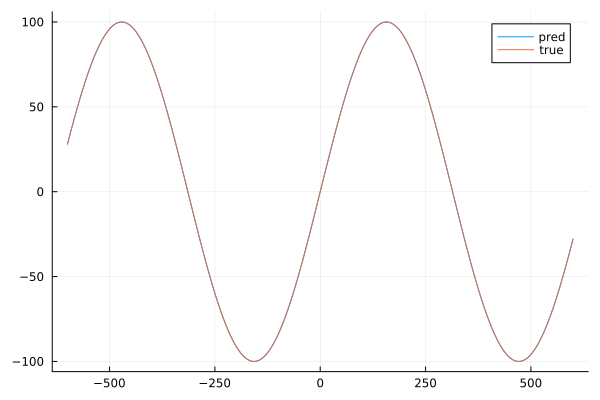

In [4]:
xs = reshape(range(-600, 600, length=1000), 1, :)
u_pred = pinn.phi(xs, res.u)
u_true = @. 100*sin(ω*xs)

using Plots
plot(vec(xs),vec(u_pred), label="pred")
plot!(vec(xs),vec(u_true), label="true")